In [1]:
import shipmmg_4dof
from shipmmg_4dof.mmg_4dof import (
    Mmg4DofBasicParams,
    Mmg4DofManeuveringParams,
    simulate_mmg_4dof,
)
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','ieee','high-vis','grid']) # ここでスタイルを設定する

# MMG 4DOF simulation DEMO using KCS model

In [2]:
ρ = 1025.0  # 海水密度

# KCS Container Ship
L_pp = 2.1905  # 船長Lpp[m]
B = 0.3067   # 船幅[m]
d = 0.1029  # 喫水[m]
g = 9.81  # 重力加速度[m/s^2]
nabla = 0.0449  # 排水量[m^3]　
x_G = -0.03242  # 重心位置[m] 
z_G = 0.01 #船体上下重心位置
z_H = 0.05145 #喫水中央
m_x_dash = 0.0061  # 付加質量x(無次元)　
m_y_dash = 0.1521  # 付加質量y(無次元)　
GM = 0.008
D_p = 0.0756  # プロペラ直径[m]
A_R = 0.00421  # 舵断面積[m^2]
x_R = -0.500  # 舵の相対位置
η = 0.792
f_α = 3.0081  # 直圧力勾配係数　教科書p24
ε = 0.900
t_R = 0.441
a_H = 0.232
x_H_dash = -0.711
γ_R0 = 0.412
l_R_dash = -0.774
z_R = 0.08 #舵の幾何学的図心
κ = 0.713
t_P = 0.178
w_P0 = 0.353
x_P_dash = -0.480  # 船長に対するプロペラ位置
J_xx_dash = 0.005
J_zz_dash = 0.0089
c_x0 = -0.12
c_xββ = 2.31
c_xrr = 3.50
c_nβ = 0.21
c_yβ = 0.05
c_nr = -0.32
c_yr = -1.20
c_γ = -0.36
a = 0.1

basic_params = Mmg4DofBasicParams(
    L_pp=L_pp,  # 船長Lpp[m]
    B=B,  # 船幅[m]
    d=d,  # 喫水[m]
    g=g,
    m=ρ * nabla,  # 質量(無次元化)[kg]
    x_G=x_G,  # 重心位置[]
    z_G=z_G,  # 船体上下重心位置[]
    z_H=z_H,  # 喫水中央
    m_x=(0.5 * ρ * (L_pp ** 2) * d) * m_x_dash,
    m_y=(0.5 * ρ * (L_pp ** 2) * d) * m_y_dash,
    m_x_dash=m_x_dash,
    m_y_dash=m_y_dash,
    GM=GM,
    D_p=D_p,  # プロペラ直径[m]
    A_R=A_R,  # 舵断面積[m^2]
    x_R=x_R,  # 舵の相対位置
    I_zz=ρ * nabla * ((0.25 * L_pp) ** 2),  # 慣性モーメント
    η=η,
    f_α=f_α,  # 直圧力勾配係数
    ϵ=ε,
    t_R=t_R,
    a_H=a_H,
    x_H=x_H_dash * L_pp,
    γ_R0=γ_R0,
    l_R_dash=l_R_dash,
    z_R=z_R,
    κ=κ,
    t_P=t_P,
    w_P0=w_P0,
    x_P=x_P_dash,
    I_xx=ρ * nabla * ((0.25 * B) ** 2),
    J_xx=(0.5 * ρ * (B ** 4) * d) * J_xx_dash,
    J_zz=(0.5 * ρ * (L_pp ** 4) * d) * J_zz_dash,
    c_x0=c_x0,
    c_xββ=c_xββ,
    c_xrr=c_xrr,
    c_nβ=c_nβ,
    c_yβ=c_yβ,
    c_nr=c_nr,
    c_yr=c_yr,
    c_γ=c_γ,
    a=a,
)


k_0 = 0.50278
k_1 = -0.29546
k_2 = -0.18095
X_0_dash = -0.0183
X_rφ_dash = 0.0258
X_vv_dash = -0.0603
X_vr_dash = -(-0.1218 + m_y_dash)
X_rr_dash = -0.0162
X_vvvv_dash = -0.0760
Y_φ_dash = -0.0052
Y_v_dash = -0.2162
Y_r_dash = 0.0245 + m_x_dash
Y_vvφ_dash = 0.3352
Y_vrφ_dash = -0.3123
Y_rrφ_dash = -0.0642
Y_vvv_dash = -1.7028
Y_vvr_dash = -0.5658
Y_vrr_dash = -0.8564
Y_rrr_dash = -0.0105
N_φ_dash = -0.0063
N_v_dash = -0.1172
N_r_dash = -0.0443
N_vvφ_dash = -0.2532
N_vrφ_dash = -0.1152
N_rrφ_dash = -0.0120
N_vvv_dash = -0.1710
N_vvr_dash = -0.5602
N_vrr_dash = -0.0200
N_rrr_dash = -0.0369
K_φ_dash = -0.0299
K_v_dash = 0.1367
K_r_dash = 0.0085
K_vvφ_dash = 0.2819
K_vrφ_dash = -0.2997
K_rrφ_dash = -0.0487
K_vvv_dash = 1.4352
K_vvr_dash = 1.1636
K_vrr_dash = 0.4233
K_rrr_dash = 0.0363

maneuvering_params = Mmg4DofManeuveringParams(
    k_0=k_0,
    k_1=k_1,
    k_2=k_2,
    X_0_dash=X_0_dash,
    X_rφ_dash=X_rφ_dash,
    X_vv_dash=X_vv_dash,
    X_vr_dash=X_vr_dash,
    X_rr_dash=X_rr_dash,
    X_vvvv_dash=X_vvvv_dash,
    Y_φ_dash=Y_φ_dash,
    Y_v_dash=Y_v_dash,
    Y_r_dash=Y_r_dash,
    Y_vvφ_dash=Y_vvφ_dash,
    Y_vrφ_dash=Y_vrφ_dash,
    Y_rrφ_dash=Y_rrφ_dash,
    Y_vvv_dash=Y_vvv_dash,
    Y_vvr_dash=Y_vvr_dash,
    Y_vrr_dash=Y_vrr_dash,
    Y_rrr_dash=Y_rrr_dash,
    N_φ_dash=N_φ_dash,
    N_v_dash=N_v_dash,
    N_r_dash=N_r_dash,
    N_vvφ_dash=N_vvφ_dash,
    N_vrφ_dash=N_vrφ_dash,
    N_rrφ_dash=N_rrφ_dash,
    N_vvv_dash=N_vvv_dash,
    N_vvr_dash=N_vvr_dash,
    N_vrr_dash=N_vrr_dash,
    N_rrr_dash=N_rrr_dash,
    K_φ_dash=K_φ_dash,
    K_v_dash=K_v_dash,
    K_r_dash=K_r_dash,
    K_vvφ_dash=K_vvφ_dash,
    K_vrφ_dash=K_vrφ_dash,
    K_rrφ_dash=K_rrφ_dash,
    K_vvv_dash=K_vvv_dash,
    K_vvr_dash=K_vvr_dash,
    K_vrr_dash=K_vrr_dash,
    K_rrr_dash=K_rrr_dash,
)

In [3]:
duration = 200  # [s]
# steering_rate = 1.76 * 4  # [°/s]
max_δ_rad = 35 * np.pi / 180.0  # [rad]
n_const = 13.2  # [rps]

sampling = duration * 10
time_list = np.linspace(0.00, duration, sampling)
δ_rad_list = [0] * sampling
for i in range(sampling):
    δ_rad_list[i] = max_δ_rad

nps_list = np.array([n_const for i in range(sampling)])

In [4]:
sol = simulate_mmg_4dof(
    basic_params,
    maneuvering_params,
    time_list,
    δ_rad_list,
    nps_list,
    u0=1.205,
    v0=0.0,
    r0=0.0,
    p0=0.0,
)
result = sol.sol(time_list)

In [5]:
u,v,r,p,x,y,psi,phi = result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]

Text(0, 0.5, '$x/L$')

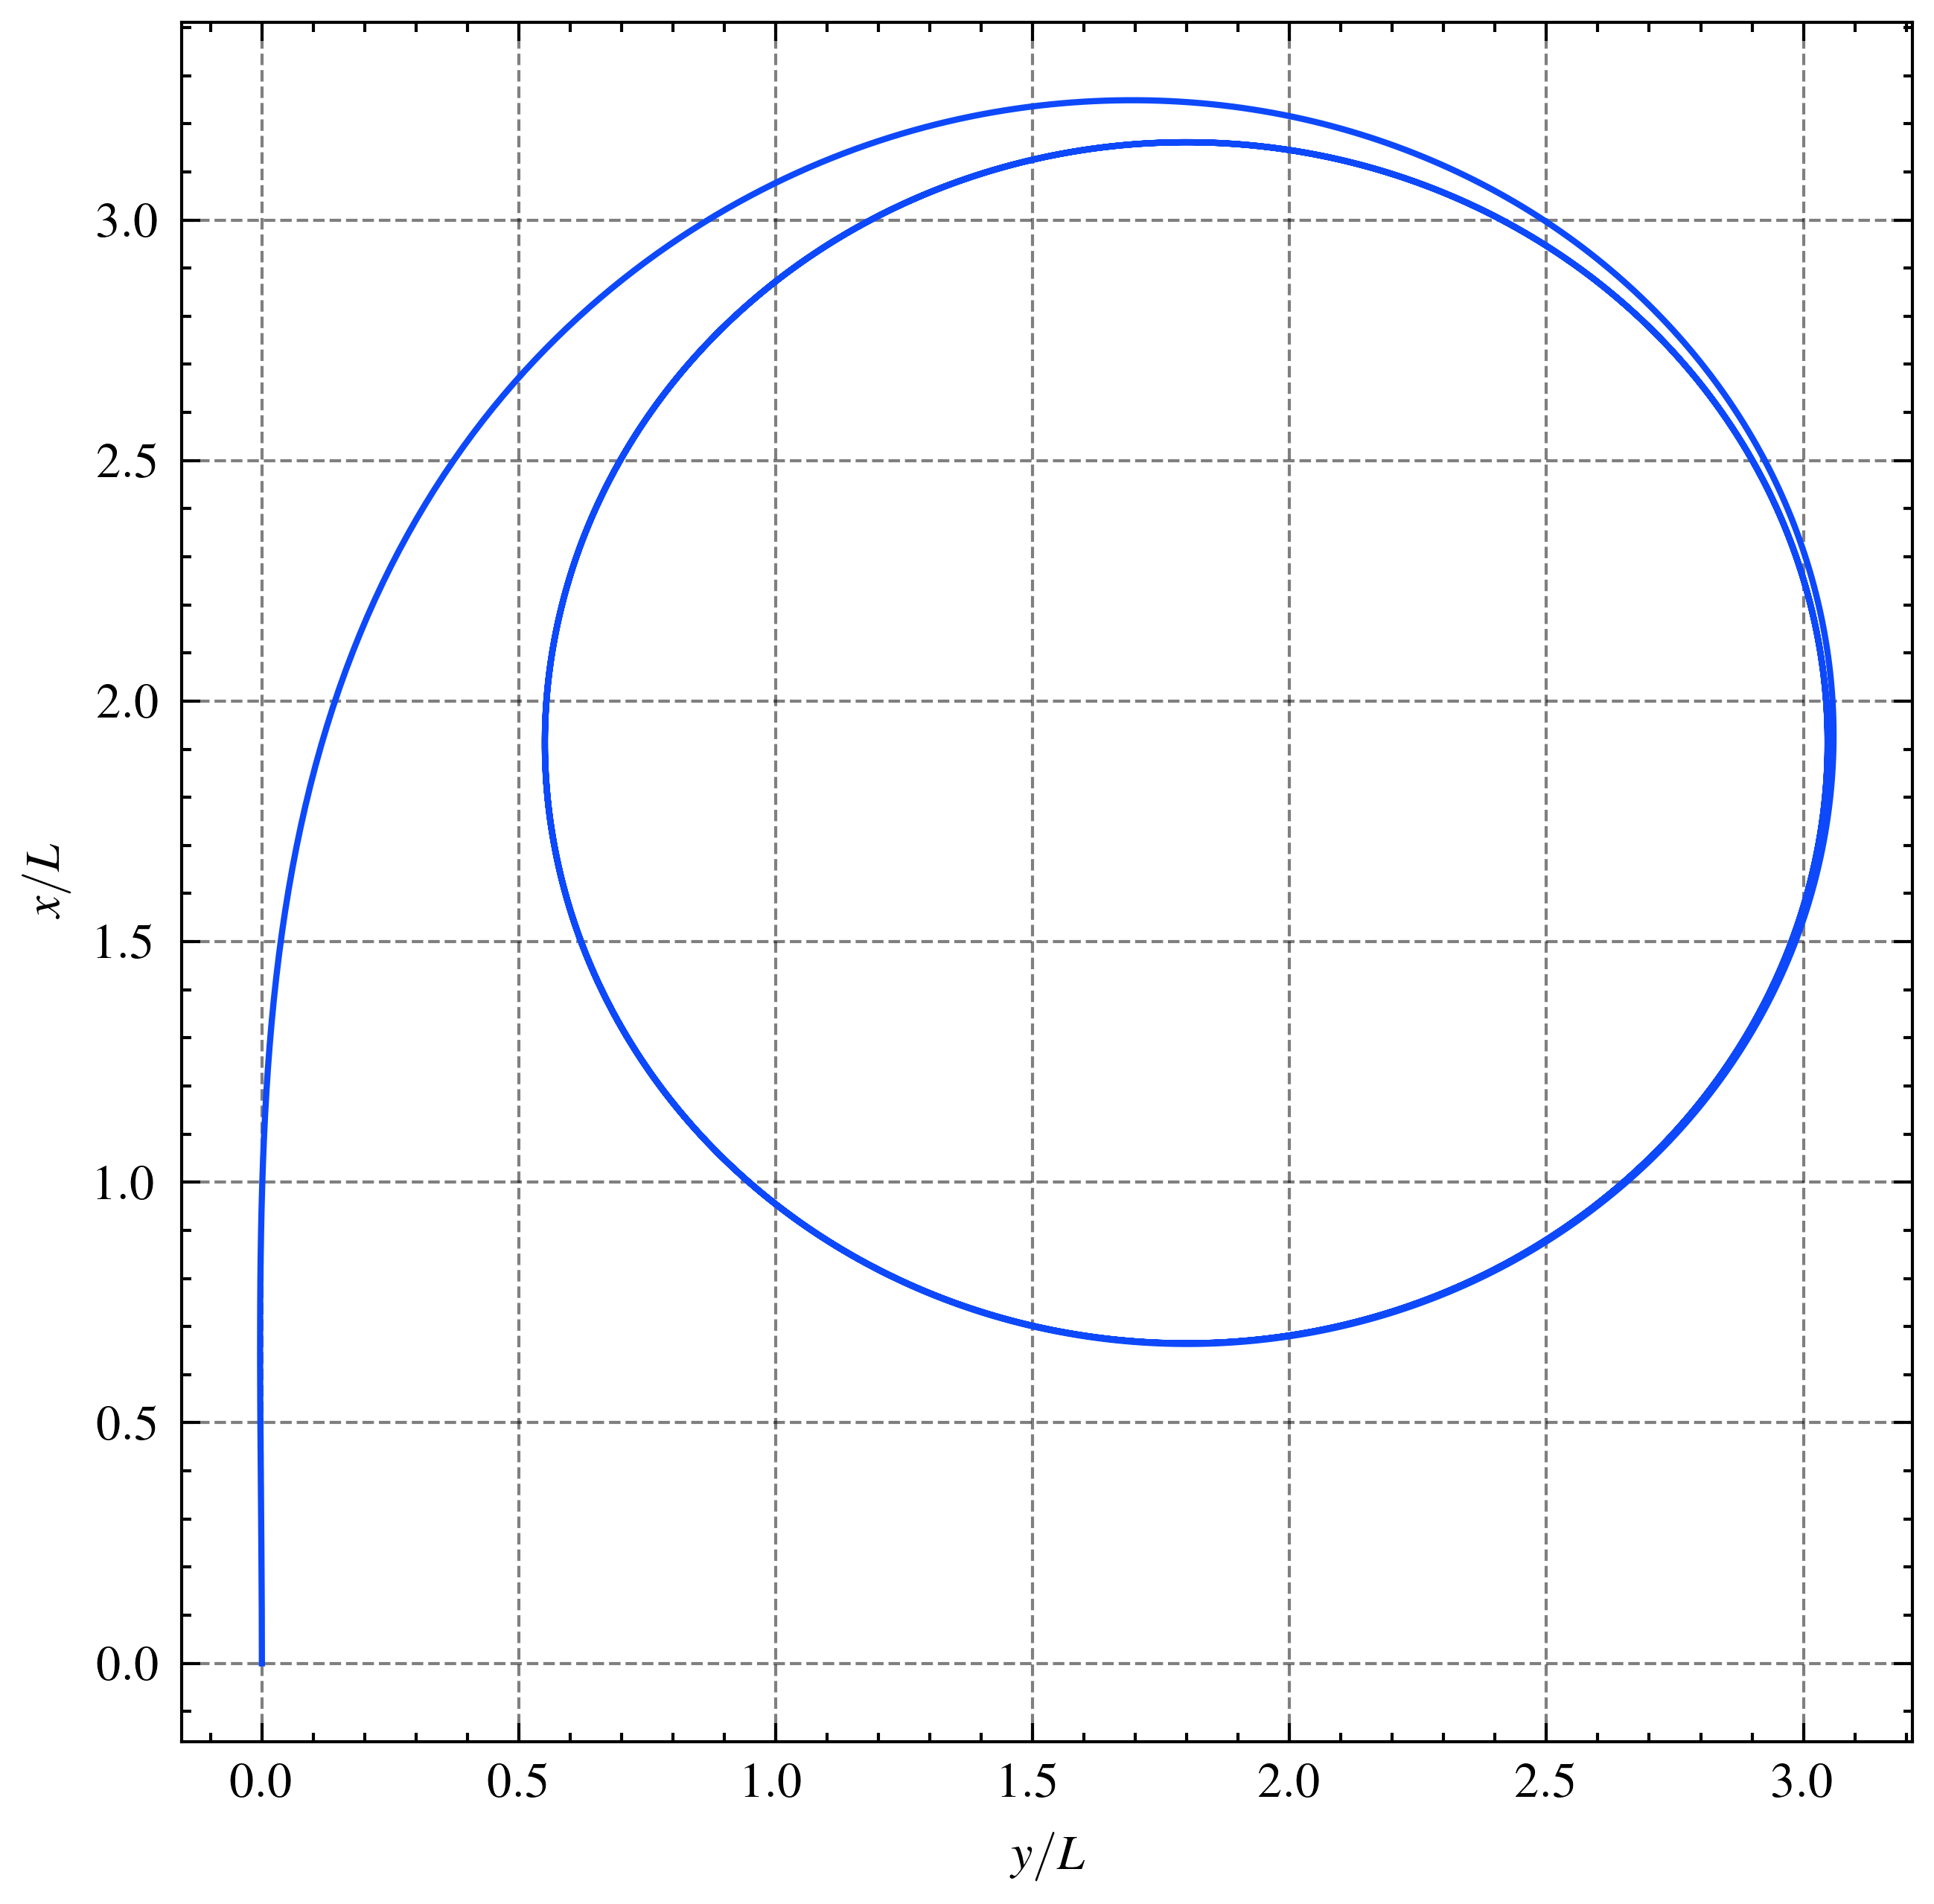

In [6]:
fig = plt.figure(figsize=(5, 5))
x_by_Lpp = x / L_pp
y_by_Lpp = y / L_pp
plt.plot(y_by_Lpp, x_by_Lpp)
plt.xlabel("$y/L$")
plt.ylabel("$x/L$")

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(time_list, u, c='#4C72B0', linewidth=3)
axs[0, 0].set_title('$u$', fontsize=24)
axs[0, 0].set_xlim(0, 40)
axs[0, 0].set(ylabel='u [m/s]')

axs[0, 1].plot(time_list, v, c='#DD8452', linewidth=3)
axs[0, 1].set_title('$v$', fontsize=24)
axs[0, 1].set_xlim(0, 40)
axs[0, 1].set(ylabel='v [m/s]')


axs[1, 0].plot(time_list, r, c='#55A868', linewidth=3)
axs[1, 0].set_title('$r$', fontsize=24)
axs[1, 0].set_xlim(0, 40)
axs[1, 0].set(ylabel='r [rad/s]')


axs[1, 1].plot(time_list, phi * 180 / np.pi, c='#8172B3', linewidth=3)
axs[1, 1].set_title('$\phi$', fontsize=24)
axs[1, 1].set_xlim(0, 40)
axs[1, 1].set(ylabel='$\phi$ [deg]')


for ax in axs.flat:
    ax.set(xlabel='Time [s]')

plt.tight_layout()
plt.show()